# Pre-training stage using the simulated data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Defines imports
import ipykernel
import os
import sys
module_path = os.path.abspath(os.path.join('/home/gustavo/Gdrive/Stanford/Lab/ODF_prediction/cleaned_scripts/utilities')) # or the path to your source code
sys.path.insert(0, module_path)


import numpy as np
import keras
import tensorflow as tf
import tensorflow_probability as tfp

import matplotlib.pyplot as plt
import os
import random

from tensorflow.keras.optimizers import Adam, SGD
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial import distance
import scipy.stats as scis
import scipy.io as scio
import pickle 

from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model

import model_functions as mfunc
import evaluation

In [3]:
# Defines constants
#_DATASET_LIST = ['dog','dog_panda','dog_sealion_panda','dog_sealion','dog_goldfish_hotpot_panda_sealion_terrier', 'goldfish_hotpot_panda_sealion_terrier']
_DATASET_LIST = ['goldfish_hotpot_panda_sealion_terrier']
_DATASET_FOLDER = '/home/gustavo/Gdrive/Stanford/Lab/ODF_prediction/datasets/synthetic'
_MODEL_FOLDER = '/home/gustavo/Gdrive/Stanford/Lab/ODF_prediction/cleaned_scripts/pretrained_models'
_RESULTS_FOLDER = '/home/gustavo/Gdrive/Stanford/Lab/ODF_prediction/cleaned_scripts/pretraining_results'
_LEARNING_RATE = 0.002
_NUM_EPOCHS = 3500
_BATCH_SIZE = 32

## Create model and train

Training dataset: goldfish_hotpot_panda_sealion_terrier
Epoch 1/3500
3950/3950 [==============================] - 6s 1ms/step - loss: 0.7376 - axon_output_loss: 0.7725 - gratio_output_loss: -0.0349 - val_loss: -0.1649 - val_axon_output_loss: 0.6146 - val_gratio_output_loss: -0.7794
Epoch 2/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.4254 - axon_output_loss: 0.5976 - gratio_output_loss: -1.0230 - val_loss: -0.5979 - val_axon_output_loss: 0.5950 - val_gratio_output_loss: -1.1930
Epoch 3/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.6509 - axon_output_loss: 0.5872 - gratio_output_loss: -1.2381 - val_loss: -0.6992 - val_axon_output_loss: 0.5899 - val_gratio_output_loss: -1.2891
Epoch 4/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.7052 - axon_output_loss: 0.5842 - gratio_output_loss: -1.2894 - val_loss: -0.7261 - val_axon_output_loss: 0.5872 - val_gratio_output_loss: -1.3134
Epoch 5/3500
3950/3950 [=========

3950/3950 [==============================] - 6s 1ms/step - loss: -0.7792 - axon_output_loss: 0.5474 - gratio_output_loss: -1.3266 - val_loss: -0.7754 - val_axon_output_loss: 0.5598 - val_gratio_output_loss: -1.3352
Epoch 37/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.7794 - axon_output_loss: 0.5474 - gratio_output_loss: -1.3269 - val_loss: -0.7757 - val_axon_output_loss: 0.5586 - val_gratio_output_loss: -1.3343
Epoch 38/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.7801 - axon_output_loss: 0.5468 - gratio_output_loss: -1.3269 - val_loss: -0.7762 - val_axon_output_loss: 0.5591 - val_gratio_output_loss: -1.3353
Epoch 39/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.7806 - axon_output_loss: 0.5466 - gratio_output_loss: -1.3272 - val_loss: -0.7745 - val_axon_output_loss: 0.5579 - val_gratio_output_loss: -1.3324
Epoch 40/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.7822 - axon_outp

Epoch 72/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.7940 - axon_output_loss: 0.5377 - gratio_output_loss: -1.3317 - val_loss: -0.7836 - val_axon_output_loss: 0.5537 - val_gratio_output_loss: -1.3373
Epoch 73/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.7948 - axon_output_loss: 0.5371 - gratio_output_loss: -1.3319 - val_loss: -0.7839 - val_axon_output_loss: 0.5533 - val_gratio_output_loss: -1.3372
Epoch 74/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.7947 - axon_output_loss: 0.5373 - gratio_output_loss: -1.3320 - val_loss: -0.7829 - val_axon_output_loss: 0.5543 - val_gratio_output_loss: -1.3372
Epoch 75/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.7952 - axon_output_loss: 0.5370 - gratio_output_loss: -1.3322 - val_loss: -0.7854 - val_axon_output_loss: 0.5510 - val_gratio_output_loss: -1.3365
Epoch 76/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.79

Epoch 108/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8017 - axon_output_loss: 0.5332 - gratio_output_loss: -1.3348 - val_loss: -0.7892 - val_axon_output_loss: 0.5497 - val_gratio_output_loss: -1.3389
Epoch 109/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8018 - axon_output_loss: 0.5330 - gratio_output_loss: -1.3348 - val_loss: -0.7905 - val_axon_output_loss: 0.5483 - val_gratio_output_loss: -1.3387
Epoch 110/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8026 - axon_output_loss: 0.5325 - gratio_output_loss: -1.3351 - val_loss: -0.7898 - val_axon_output_loss: 0.5487 - val_gratio_output_loss: -1.3385
Epoch 111/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8021 - axon_output_loss: 0.5330 - gratio_output_loss: -1.3350 - val_loss: -0.7720 - val_axon_output_loss: 0.5618 - val_gratio_output_loss: -1.3338
Epoch 112/3500
3950/3950 [==============================] - 5s 1ms/step - loss: 

Epoch 144/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8070 - axon_output_loss: 0.5296 - gratio_output_loss: -1.3366 - val_loss: -0.7922 - val_axon_output_loss: 0.5476 - val_gratio_output_loss: -1.3398
Epoch 145/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8065 - axon_output_loss: 0.5300 - gratio_output_loss: -1.3366 - val_loss: -0.7913 - val_axon_output_loss: 0.5484 - val_gratio_output_loss: -1.3398
Epoch 146/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8068 - axon_output_loss: 0.5298 - gratio_output_loss: -1.3366 - val_loss: -0.7895 - val_axon_output_loss: 0.5495 - val_gratio_output_loss: -1.3390
Epoch 147/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8064 - axon_output_loss: 0.5301 - gratio_output_loss: -1.3365 - val_loss: -0.7828 - val_axon_output_loss: 0.5565 - val_gratio_output_loss: -1.3393
Epoch 148/3500
3950/3950 [==============================] - 5s 1ms/step - loss: 

Epoch 180/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8097 - axon_output_loss: 0.5277 - gratio_output_loss: -1.3374 - val_loss: -0.7927 - val_axon_output_loss: 0.5476 - val_gratio_output_loss: -1.3402
Epoch 181/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8096 - axon_output_loss: 0.5279 - gratio_output_loss: -1.3375 - val_loss: -0.7935 - val_axon_output_loss: 0.5465 - val_gratio_output_loss: -1.3400
Epoch 182/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8101 - axon_output_loss: 0.5275 - gratio_output_loss: -1.3375 - val_loss: -0.7922 - val_axon_output_loss: 0.5479 - val_gratio_output_loss: -1.3402
Epoch 183/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8097 - axon_output_loss: 0.5278 - gratio_output_loss: -1.3375 - val_loss: -0.7912 - val_axon_output_loss: 0.5486 - val_gratio_output_loss: -1.3398
Epoch 184/3500
3950/3950 [==============================] - 5s 1ms/step - loss: 

Epoch 216/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8122 - axon_output_loss: 0.5259 - gratio_output_loss: -1.3381 - val_loss: -0.7916 - val_axon_output_loss: 0.5477 - val_gratio_output_loss: -1.3393
Epoch 217/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8122 - axon_output_loss: 0.5259 - gratio_output_loss: -1.3381 - val_loss: -0.7905 - val_axon_output_loss: 0.5481 - val_gratio_output_loss: -1.3386
Epoch 218/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8125 - axon_output_loss: 0.5257 - gratio_output_loss: -1.3382 - val_loss: -0.7920 - val_axon_output_loss: 0.5472 - val_gratio_output_loss: -1.3392
Epoch 219/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8124 - axon_output_loss: 0.5257 - gratio_output_loss: -1.3381 - val_loss: -0.7922 - val_axon_output_loss: 0.5475 - val_gratio_output_loss: -1.3397
Epoch 220/3500
3950/3950 [==============================] - 5s 1ms/step - loss: 

Epoch 252/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8147 - axon_output_loss: 0.5240 - gratio_output_loss: -1.3387 - val_loss: -0.7942 - val_axon_output_loss: 0.5465 - val_gratio_output_loss: -1.3407
Epoch 253/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8147 - axon_output_loss: 0.5242 - gratio_output_loss: -1.3389 - val_loss: -0.7925 - val_axon_output_loss: 0.5481 - val_gratio_output_loss: -1.3406
Epoch 254/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8153 - axon_output_loss: 0.5235 - gratio_output_loss: -1.3389 - val_loss: -0.7836 - val_axon_output_loss: 0.5550 - val_gratio_output_loss: -1.3386
Epoch 255/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8151 - axon_output_loss: 0.5238 - gratio_output_loss: -1.3389 - val_loss: -0.7933 - val_axon_output_loss: 0.5474 - val_gratio_output_loss: -1.3407
Epoch 256/3500
3950/3950 [==============================] - 5s 1ms/step - loss: 

Epoch 288/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8171 - axon_output_loss: 0.5222 - gratio_output_loss: -1.3393 - val_loss: -0.7872 - val_axon_output_loss: 0.5534 - val_gratio_output_loss: -1.3406
Epoch 289/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8172 - axon_output_loss: 0.5221 - gratio_output_loss: -1.3393 - val_loss: -0.7937 - val_axon_output_loss: 0.5465 - val_gratio_output_loss: -1.3401
Epoch 290/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8168 - axon_output_loss: 0.5226 - gratio_output_loss: -1.3393 - val_loss: -0.7945 - val_axon_output_loss: 0.5464 - val_gratio_output_loss: -1.3409
Epoch 291/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8174 - axon_output_loss: 0.5219 - gratio_output_loss: -1.3393 - val_loss: -0.7938 - val_axon_output_loss: 0.5473 - val_gratio_output_loss: -1.3411
Epoch 292/3500
3950/3950 [==============================] - 5s 1ms/step - loss: 

Epoch 324/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8189 - axon_output_loss: 0.5208 - gratio_output_loss: -1.3397 - val_loss: -0.7519 - val_axon_output_loss: 0.5864 - val_gratio_output_loss: -1.3383
Epoch 325/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8191 - axon_output_loss: 0.5206 - gratio_output_loss: -1.3397 - val_loss: -0.7888 - val_axon_output_loss: 0.5518 - val_gratio_output_loss: -1.3405
Epoch 326/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8190 - axon_output_loss: 0.5207 - gratio_output_loss: -1.3397 - val_loss: -0.7823 - val_axon_output_loss: 0.5545 - val_gratio_output_loss: -1.3368
Epoch 327/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8192 - axon_output_loss: 0.5205 - gratio_output_loss: -1.3398 - val_loss: -0.7890 - val_axon_output_loss: 0.5511 - val_gratio_output_loss: -1.3401
Epoch 328/3500
3950/3950 [==============================] - 5s 1ms/step - loss: 

Epoch 360/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8207 - axon_output_loss: 0.5195 - gratio_output_loss: -1.3401 - val_loss: -0.7950 - val_axon_output_loss: 0.5466 - val_gratio_output_loss: -1.3416
Epoch 361/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8210 - axon_output_loss: 0.5190 - gratio_output_loss: -1.3401 - val_loss: -0.7675 - val_axon_output_loss: 0.5730 - val_gratio_output_loss: -1.3405
Epoch 362/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8211 - axon_output_loss: 0.5190 - gratio_output_loss: -1.3401 - val_loss: -0.7934 - val_axon_output_loss: 0.5481 - val_gratio_output_loss: -1.3415
Epoch 363/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8208 - axon_output_loss: 0.5193 - gratio_output_loss: -1.3401 - val_loss: -0.7827 - val_axon_output_loss: 0.5584 - val_gratio_output_loss: -1.3411
Epoch 364/3500
3950/3950 [==============================] - 5s 1ms/step - loss: 

Epoch 396/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8219 - axon_output_loss: 0.5184 - gratio_output_loss: -1.3404 - val_loss: -0.7927 - val_axon_output_loss: 0.5481 - val_gratio_output_loss: -1.3408
Epoch 397/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8220 - axon_output_loss: 0.5184 - gratio_output_loss: -1.3404 - val_loss: -0.7954 - val_axon_output_loss: 0.5464 - val_gratio_output_loss: -1.3419
Epoch 398/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8224 - axon_output_loss: 0.5180 - gratio_output_loss: -1.3404 - val_loss: -0.7863 - val_axon_output_loss: 0.5552 - val_gratio_output_loss: -1.3415
Epoch 399/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8223 - axon_output_loss: 0.5181 - gratio_output_loss: -1.3404 - val_loss: -0.7927 - val_axon_output_loss: 0.5484 - val_gratio_output_loss: -1.3411
Epoch 400/3500
3950/3950 [==============================] - 5s 1ms/step - loss: 

Epoch 432/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8236 - axon_output_loss: 0.5171 - gratio_output_loss: -1.3407 - val_loss: -0.7930 - val_axon_output_loss: 0.5478 - val_gratio_output_loss: -1.3409
Epoch 433/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8233 - axon_output_loss: 0.5174 - gratio_output_loss: -1.3407 - val_loss: -0.7861 - val_axon_output_loss: 0.5555 - val_gratio_output_loss: -1.3416
Epoch 434/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8238 - axon_output_loss: 0.5170 - gratio_output_loss: -1.3407 - val_loss: -0.7938 - val_axon_output_loss: 0.5481 - val_gratio_output_loss: -1.3420
Epoch 435/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8235 - axon_output_loss: 0.5173 - gratio_output_loss: -1.3408 - val_loss: -0.7919 - val_axon_output_loss: 0.5474 - val_gratio_output_loss: -1.3394
Epoch 436/3500
3950/3950 [==============================] - 6s 1ms/step - loss: 

Epoch 468/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8250 - axon_output_loss: 0.5159 - gratio_output_loss: -1.3409 - val_loss: -0.7938 - val_axon_output_loss: 0.5480 - val_gratio_output_loss: -1.3419
Epoch 469/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8248 - axon_output_loss: 0.5162 - gratio_output_loss: -1.3410 - val_loss: -0.7963 - val_axon_output_loss: 0.5458 - val_gratio_output_loss: -1.3421
Epoch 470/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8254 - axon_output_loss: 0.5156 - gratio_output_loss: -1.3411 - val_loss: -0.7956 - val_axon_output_loss: 0.5463 - val_gratio_output_loss: -1.3419
Epoch 471/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8249 - axon_output_loss: 0.5161 - gratio_output_loss: -1.3410 - val_loss: -0.7967 - val_axon_output_loss: 0.5456 - val_gratio_output_loss: -1.3423
Epoch 472/3500
3950/3950 [==============================] - 5s 1ms/step - loss: 

Epoch 504/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8263 - axon_output_loss: 0.5151 - gratio_output_loss: -1.3414 - val_loss: -0.7969 - val_axon_output_loss: 0.5456 - val_gratio_output_loss: -1.3424
Epoch 505/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8265 - axon_output_loss: 0.5149 - gratio_output_loss: -1.3413 - val_loss: -0.7961 - val_axon_output_loss: 0.5461 - val_gratio_output_loss: -1.3422
Epoch 506/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8262 - axon_output_loss: 0.5152 - gratio_output_loss: -1.3413 - val_loss: -0.7953 - val_axon_output_loss: 0.5471 - val_gratio_output_loss: -1.3424
Epoch 507/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8263 - axon_output_loss: 0.5150 - gratio_output_loss: -1.3413 - val_loss: -0.7913 - val_axon_output_loss: 0.5511 - val_gratio_output_loss: -1.3424
Epoch 508/3500
3950/3950 [==============================] - 5s 1ms/step - loss: 

Epoch 540/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8274 - axon_output_loss: 0.5142 - gratio_output_loss: -1.3415 - val_loss: -0.7963 - val_axon_output_loss: 0.5462 - val_gratio_output_loss: -1.3425
Epoch 541/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8276 - axon_output_loss: 0.5139 - gratio_output_loss: -1.3415 - val_loss: -0.7906 - val_axon_output_loss: 0.5500 - val_gratio_output_loss: -1.3406
Epoch 542/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8272 - axon_output_loss: 0.5144 - gratio_output_loss: -1.3416 - val_loss: -0.7956 - val_axon_output_loss: 0.5465 - val_gratio_output_loss: -1.3421
Epoch 543/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8278 - axon_output_loss: 0.5138 - gratio_output_loss: -1.3416 - val_loss: -0.7947 - val_axon_output_loss: 0.5467 - val_gratio_output_loss: -1.3414
Epoch 544/3500
3950/3950 [==============================] - 5s 1ms/step - loss: 

Epoch 576/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8284 - axon_output_loss: 0.5135 - gratio_output_loss: -1.3418 - val_loss: -0.7848 - val_axon_output_loss: 0.5566 - val_gratio_output_loss: -1.3414
Epoch 577/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8284 - axon_output_loss: 0.5135 - gratio_output_loss: -1.3418 - val_loss: -0.7988 - val_axon_output_loss: 0.5442 - val_gratio_output_loss: -1.3430
Epoch 578/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8286 - axon_output_loss: 0.5133 - gratio_output_loss: -1.3419 - val_loss: -0.7941 - val_axon_output_loss: 0.5459 - val_gratio_output_loss: -1.3400
Epoch 579/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8285 - axon_output_loss: 0.5134 - gratio_output_loss: -1.3419 - val_loss: -0.7966 - val_axon_output_loss: 0.5465 - val_gratio_output_loss: -1.3431
Epoch 580/3500
3950/3950 [==============================] - 5s 1ms/step - loss: 

Epoch 612/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8292 - axon_output_loss: 0.5129 - gratio_output_loss: -1.3421 - val_loss: -0.7993 - val_axon_output_loss: 0.5439 - val_gratio_output_loss: -1.3432
Epoch 613/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8299 - axon_output_loss: 0.5123 - gratio_output_loss: -1.3422 - val_loss: -0.7962 - val_axon_output_loss: 0.5449 - val_gratio_output_loss: -1.3411
Epoch 614/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8298 - axon_output_loss: 0.5123 - gratio_output_loss: -1.3421 - val_loss: -0.7982 - val_axon_output_loss: 0.5450 - val_gratio_output_loss: -1.3433
Epoch 615/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8299 - axon_output_loss: 0.5121 - gratio_output_loss: -1.3421 - val_loss: -0.7837 - val_axon_output_loss: 0.5569 - val_gratio_output_loss: -1.3406
Epoch 616/3500
3950/3950 [==============================] - 5s 1ms/step - loss: 

Epoch 648/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8308 - axon_output_loss: 0.5116 - gratio_output_loss: -1.3424 - val_loss: -0.7957 - val_axon_output_loss: 0.5468 - val_gratio_output_loss: -1.3425
Epoch 649/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8302 - axon_output_loss: 0.5120 - gratio_output_loss: -1.3422 - val_loss: -0.7971 - val_axon_output_loss: 0.5461 - val_gratio_output_loss: -1.3432
Epoch 650/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8306 - axon_output_loss: 0.5118 - gratio_output_loss: -1.3423 - val_loss: -0.7871 - val_axon_output_loss: 0.5549 - val_gratio_output_loss: -1.3420
Epoch 651/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8307 - axon_output_loss: 0.5117 - gratio_output_loss: -1.3424 - val_loss: -0.7990 - val_axon_output_loss: 0.5443 - val_gratio_output_loss: -1.3433
Epoch 652/3500
3950/3950 [==============================] - 6s 1ms/step - loss: 

Epoch 684/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8318 - axon_output_loss: 0.5108 - gratio_output_loss: -1.3426 - val_loss: -0.7979 - val_axon_output_loss: 0.5456 - val_gratio_output_loss: -1.3434
Epoch 685/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8318 - axon_output_loss: 0.5107 - gratio_output_loss: -1.3425 - val_loss: -0.7974 - val_axon_output_loss: 0.5461 - val_gratio_output_loss: -1.3435
Epoch 686/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8317 - axon_output_loss: 0.5108 - gratio_output_loss: -1.3426 - val_loss: -0.7965 - val_axon_output_loss: 0.5466 - val_gratio_output_loss: -1.3432
Epoch 687/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8319 - axon_output_loss: 0.5106 - gratio_output_loss: -1.3426 - val_loss: -0.7731 - val_axon_output_loss: 0.5691 - val_gratio_output_loss: -1.3422
Epoch 688/3500
3950/3950 [==============================] - 5s 1ms/step - loss: 

Epoch 720/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8320 - axon_output_loss: 0.5107 - gratio_output_loss: -1.3427 - val_loss: -0.7994 - val_axon_output_loss: 0.5439 - val_gratio_output_loss: -1.3433
Epoch 721/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8327 - axon_output_loss: 0.5100 - gratio_output_loss: -1.3428 - val_loss: -0.7977 - val_axon_output_loss: 0.5447 - val_gratio_output_loss: -1.3424
Epoch 722/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8329 - axon_output_loss: 0.5099 - gratio_output_loss: -1.3428 - val_loss: -0.7979 - val_axon_output_loss: 0.5451 - val_gratio_output_loss: -1.3430
Epoch 723/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8325 - axon_output_loss: 0.5102 - gratio_output_loss: -1.3427 - val_loss: -0.7993 - val_axon_output_loss: 0.5438 - val_gratio_output_loss: -1.3430
Epoch 724/3500
3950/3950 [==============================] - 5s 1ms/step - loss: 

Epoch 756/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8330 - axon_output_loss: 0.5099 - gratio_output_loss: -1.3429 - val_loss: -0.7945 - val_axon_output_loss: 0.5482 - val_gratio_output_loss: -1.3427
Epoch 757/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8337 - axon_output_loss: 0.5093 - gratio_output_loss: -1.3430 - val_loss: -0.7978 - val_axon_output_loss: 0.5452 - val_gratio_output_loss: -1.3430
Epoch 758/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8329 - axon_output_loss: 0.5101 - gratio_output_loss: -1.3429 - val_loss: -0.7979 - val_axon_output_loss: 0.5453 - val_gratio_output_loss: -1.3433
Epoch 759/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8332 - axon_output_loss: 0.5097 - gratio_output_loss: -1.3429 - val_loss: -0.7999 - val_axon_output_loss: 0.5437 - val_gratio_output_loss: -1.3436
Epoch 760/3500
3950/3950 [==============================] - 5s 1ms/step - loss: 

Epoch 792/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8346 - axon_output_loss: 0.5085 - gratio_output_loss: -1.3432 - val_loss: -0.7981 - val_axon_output_loss: 0.5456 - val_gratio_output_loss: -1.3437
Epoch 793/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8343 - axon_output_loss: 0.5089 - gratio_output_loss: -1.3431 - val_loss: -0.8004 - val_axon_output_loss: 0.5435 - val_gratio_output_loss: -1.3439
Epoch 794/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8343 - axon_output_loss: 0.5089 - gratio_output_loss: -1.3431 - val_loss: -0.8003 - val_axon_output_loss: 0.5437 - val_gratio_output_loss: -1.3440
Epoch 795/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8341 - axon_output_loss: 0.5091 - gratio_output_loss: -1.3432 - val_loss: -0.7969 - val_axon_output_loss: 0.5463 - val_gratio_output_loss: -1.3432
Epoch 796/3500
3950/3950 [==============================] - 5s 1ms/step - loss: 

Epoch 828/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8347 - axon_output_loss: 0.5086 - gratio_output_loss: -1.3432 - val_loss: -0.7876 - val_axon_output_loss: 0.5564 - val_gratio_output_loss: -1.3439
Epoch 829/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8345 - axon_output_loss: 0.5087 - gratio_output_loss: -1.3432 - val_loss: -0.8008 - val_axon_output_loss: 0.5434 - val_gratio_output_loss: -1.3442
Epoch 830/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8349 - axon_output_loss: 0.5083 - gratio_output_loss: -1.3433 - val_loss: -0.7973 - val_axon_output_loss: 0.5450 - val_gratio_output_loss: -1.3424
Epoch 831/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8349 - axon_output_loss: 0.5083 - gratio_output_loss: -1.3433 - val_loss: -0.7999 - val_axon_output_loss: 0.5443 - val_gratio_output_loss: -1.3442
Epoch 832/3500
3950/3950 [==============================] - 5s 1ms/step - loss: 

Epoch 864/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8357 - axon_output_loss: 0.5078 - gratio_output_loss: -1.3435 - val_loss: -0.8009 - val_axon_output_loss: 0.5433 - val_gratio_output_loss: -1.3442
Epoch 865/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8357 - axon_output_loss: 0.5077 - gratio_output_loss: -1.3434 - val_loss: -0.7988 - val_axon_output_loss: 0.5454 - val_gratio_output_loss: -1.3442
Epoch 866/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8357 - axon_output_loss: 0.5077 - gratio_output_loss: -1.3434 - val_loss: -0.7998 - val_axon_output_loss: 0.5442 - val_gratio_output_loss: -1.3441
Epoch 867/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8359 - axon_output_loss: 0.5077 - gratio_output_loss: -1.3435 - val_loss: -0.7984 - val_axon_output_loss: 0.5457 - val_gratio_output_loss: -1.3441
Epoch 868/3500
3950/3950 [==============================] - 5s 1ms/step - loss: 

Epoch 900/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8361 - axon_output_loss: 0.5074 - gratio_output_loss: -1.3436 - val_loss: -0.7825 - val_axon_output_loss: 0.5589 - val_gratio_output_loss: -1.3414
Epoch 901/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8363 - axon_output_loss: 0.5073 - gratio_output_loss: -1.3436 - val_loss: -0.7987 - val_axon_output_loss: 0.5452 - val_gratio_output_loss: -1.3438
Epoch 902/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8359 - axon_output_loss: 0.5077 - gratio_output_loss: -1.3436 - val_loss: -0.7988 - val_axon_output_loss: 0.5454 - val_gratio_output_loss: -1.3442
Epoch 903/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8360 - axon_output_loss: 0.5076 - gratio_output_loss: -1.3436 - val_loss: -0.8017 - val_axon_output_loss: 0.5426 - val_gratio_output_loss: -1.3443
Epoch 904/3500
3950/3950 [==============================] - 5s 1ms/step - loss: 

Epoch 936/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8374 - axon_output_loss: 0.5063 - gratio_output_loss: -1.3437 - val_loss: -0.7978 - val_axon_output_loss: 0.5459 - val_gratio_output_loss: -1.3438
Epoch 937/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8365 - axon_output_loss: 0.5072 - gratio_output_loss: -1.3436 - val_loss: -0.8007 - val_axon_output_loss: 0.5437 - val_gratio_output_loss: -1.3444
Epoch 938/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8372 - axon_output_loss: 0.5065 - gratio_output_loss: -1.3437 - val_loss: -0.7998 - val_axon_output_loss: 0.5445 - val_gratio_output_loss: -1.3444
Epoch 939/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8369 - axon_output_loss: 0.5068 - gratio_output_loss: -1.3437 - val_loss: -0.7967 - val_axon_output_loss: 0.5477 - val_gratio_output_loss: -1.3444
Epoch 940/3500
3950/3950 [==============================] - 5s 1ms/step - loss: 

Epoch 972/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8372 - axon_output_loss: 0.5065 - gratio_output_loss: -1.3438 - val_loss: -0.8006 - val_axon_output_loss: 0.5434 - val_gratio_output_loss: -1.3440
Epoch 973/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8379 - axon_output_loss: 0.5060 - gratio_output_loss: -1.3438 - val_loss: -0.7942 - val_axon_output_loss: 0.5488 - val_gratio_output_loss: -1.3430
Epoch 974/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8376 - axon_output_loss: 0.5063 - gratio_output_loss: -1.3438 - val_loss: -0.7979 - val_axon_output_loss: 0.5461 - val_gratio_output_loss: -1.3440
Epoch 975/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8376 - axon_output_loss: 0.5062 - gratio_output_loss: -1.3438 - val_loss: -0.7976 - val_axon_output_loss: 0.5446 - val_gratio_output_loss: -1.3422
Epoch 976/3500
3950/3950 [==============================] - 5s 1ms/step - loss: 

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8381 - axon_output_loss: 0.5058 - gratio_output_loss: -1.3439 - val_loss: -0.8005 - val_axon_output_loss: 0.5439 - val_gratio_output_loss: -1.3444
Epoch 1008/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8378 - axon_output_loss: 0.5061 - gratio_output_loss: -1.3439 - val_loss: -0.7984 - val_axon_output_loss: 0.5459 - val_gratio_output_loss: -1.3442
Epoch 1009/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8382 - axon_output_loss: 0.5057 - gratio_output_loss: -1.3440 - val_loss: -0.8001 - val_axon_output_loss: 0.5445 - val_gratio_output_loss: -1.3446
Epoch 1010/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8381 - axon_output_loss: 0.5057 - gratio_output_loss: -1.3439 - val_loss: -0.8023 - val_axon_output_loss: 0.5424 - val_gratio_output_loss: -1.3447
Epoch 1011/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8379 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8387 - axon_output_loss: 0.5053 - gratio_output_loss: -1.3440 - val_loss: -0.7980 - val_axon_output_loss: 0.5457 - val_gratio_output_loss: -1.3438
Epoch 1043/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8386 - axon_output_loss: 0.5054 - gratio_output_loss: -1.3440 - val_loss: -0.8001 - val_axon_output_loss: 0.5443 - val_gratio_output_loss: -1.3444
Epoch 1044/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8386 - axon_output_loss: 0.5054 - gratio_output_loss: -1.3440 - val_loss: -0.7963 - val_axon_output_loss: 0.5477 - val_gratio_output_loss: -1.3440
Epoch 1045/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8386 - axon_output_loss: 0.5054 - gratio_output_loss: -1.3440 - val_loss: -0.7948 - val_axon_output_loss: 0.5493 - val_gratio_output_loss: -1.3441
Epoch 1046/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8391 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8392 - axon_output_loss: 0.5049 - gratio_output_loss: -1.3441 - val_loss: -0.7995 - val_axon_output_loss: 0.5451 - val_gratio_output_loss: -1.3446
Epoch 1078/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8390 - axon_output_loss: 0.5051 - gratio_output_loss: -1.3441 - val_loss: -0.8002 - val_axon_output_loss: 0.5438 - val_gratio_output_loss: -1.3439
Epoch 1079/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8390 - axon_output_loss: 0.5051 - gratio_output_loss: -1.3441 - val_loss: -0.7877 - val_axon_output_loss: 0.5544 - val_gratio_output_loss: -1.3421
Epoch 1080/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8389 - axon_output_loss: 0.5052 - gratio_output_loss: -1.3441 - val_loss: -0.7977 - val_axon_output_loss: 0.5462 - val_gratio_output_loss: -1.3440
Epoch 1081/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8393 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8396 - axon_output_loss: 0.5045 - gratio_output_loss: -1.3442 - val_loss: -0.7967 - val_axon_output_loss: 0.5465 - val_gratio_output_loss: -1.3433
Epoch 1113/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8397 - axon_output_loss: 0.5046 - gratio_output_loss: -1.3442 - val_loss: -0.7992 - val_axon_output_loss: 0.5446 - val_gratio_output_loss: -1.3438
Epoch 1114/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8391 - axon_output_loss: 0.5050 - gratio_output_loss: -1.3442 - val_loss: -0.7993 - val_axon_output_loss: 0.5455 - val_gratio_output_loss: -1.3448
Epoch 1115/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8396 - axon_output_loss: 0.5046 - gratio_output_loss: -1.3442 - val_loss: -0.7999 - val_axon_output_loss: 0.5445 - val_gratio_output_loss: -1.3443
Epoch 1116/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8389 - a

3950/3950 [==============================] - 6s 1ms/step - loss: -0.8397 - axon_output_loss: 0.5045 - gratio_output_loss: -1.3443 - val_loss: -0.7981 - val_axon_output_loss: 0.5465 - val_gratio_output_loss: -1.3446
Epoch 1148/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8401 - axon_output_loss: 0.5042 - gratio_output_loss: -1.3443 - val_loss: -0.7999 - val_axon_output_loss: 0.5445 - val_gratio_output_loss: -1.3444
Epoch 1149/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8399 - axon_output_loss: 0.5044 - gratio_output_loss: -1.3443 - val_loss: -0.8011 - val_axon_output_loss: 0.5437 - val_gratio_output_loss: -1.3448
Epoch 1150/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8396 - axon_output_loss: 0.5046 - gratio_output_loss: -1.3443 - val_loss: -0.8004 - val_axon_output_loss: 0.5439 - val_gratio_output_loss: -1.3442
Epoch 1151/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8393 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8403 - axon_output_loss: 0.5041 - gratio_output_loss: -1.3443 - val_loss: -0.7968 - val_axon_output_loss: 0.5461 - val_gratio_output_loss: -1.3429
Epoch 1183/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8405 - axon_output_loss: 0.5038 - gratio_output_loss: -1.3443 - val_loss: -0.7993 - val_axon_output_loss: 0.5451 - val_gratio_output_loss: -1.3444
Epoch 1184/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8401 - axon_output_loss: 0.5041 - gratio_output_loss: -1.3443 - val_loss: -0.7999 - val_axon_output_loss: 0.5445 - val_gratio_output_loss: -1.3445
Epoch 1185/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8400 - axon_output_loss: 0.5043 - gratio_output_loss: -1.3443 - val_loss: -0.7837 - val_axon_output_loss: 0.5611 - val_gratio_output_loss: -1.3447
Epoch 1186/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8400 - a

3950/3950 [==============================] - 6s 1ms/step - loss: -0.8407 - axon_output_loss: 0.5036 - gratio_output_loss: -1.3444 - val_loss: -0.7935 - val_axon_output_loss: 0.5497 - val_gratio_output_loss: -1.3432
Epoch 1218/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8407 - axon_output_loss: 0.5037 - gratio_output_loss: -1.3444 - val_loss: -0.7987 - val_axon_output_loss: 0.5459 - val_gratio_output_loss: -1.3445
Epoch 1219/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8409 - axon_output_loss: 0.5035 - gratio_output_loss: -1.3444 - val_loss: -0.7957 - val_axon_output_loss: 0.5491 - val_gratio_output_loss: -1.3448
Epoch 1220/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8408 - axon_output_loss: 0.5037 - gratio_output_loss: -1.3444 - val_loss: -0.7987 - val_axon_output_loss: 0.5460 - val_gratio_output_loss: -1.3447
Epoch 1221/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8402 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8408 - axon_output_loss: 0.5036 - gratio_output_loss: -1.3444 - val_loss: -0.7988 - val_axon_output_loss: 0.5456 - val_gratio_output_loss: -1.3444
Epoch 1253/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8411 - axon_output_loss: 0.5033 - gratio_output_loss: -1.3444 - val_loss: -0.7808 - val_axon_output_loss: 0.5640 - val_gratio_output_loss: -1.3448
Epoch 1254/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8408 - axon_output_loss: 0.5036 - gratio_output_loss: -1.3444 - val_loss: -0.7964 - val_axon_output_loss: 0.5483 - val_gratio_output_loss: -1.3447
Epoch 1255/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8408 - axon_output_loss: 0.5036 - gratio_output_loss: -1.3444 - val_loss: -0.7991 - val_axon_output_loss: 0.5447 - val_gratio_output_loss: -1.3439
Epoch 1256/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8409 - a

3950/3950 [==============================] - 6s 1ms/step - loss: -0.8415 - axon_output_loss: 0.5030 - gratio_output_loss: -1.3445 - val_loss: -0.7818 - val_axon_output_loss: 0.5626 - val_gratio_output_loss: -1.3444
Epoch 1288/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8414 - axon_output_loss: 0.5031 - gratio_output_loss: -1.3445 - val_loss: -0.7999 - val_axon_output_loss: 0.5440 - val_gratio_output_loss: -1.3439
Epoch 1289/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8413 - axon_output_loss: 0.5032 - gratio_output_loss: -1.3445 - val_loss: -0.7752 - val_axon_output_loss: 0.5693 - val_gratio_output_loss: -1.3445
Epoch 1290/3500
3950/3950 [==============================] - 6s 2ms/step - loss: -0.8411 - axon_output_loss: 0.5033 - gratio_output_loss: -1.3445 - val_loss: -0.7879 - val_axon_output_loss: 0.5547 - val_gratio_output_loss: -1.3426
Epoch 1291/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8411 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8417 - axon_output_loss: 0.5029 - gratio_output_loss: -1.3446 - val_loss: -0.8004 - val_axon_output_loss: 0.5442 - val_gratio_output_loss: -1.3446
Epoch 1323/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8414 - axon_output_loss: 0.5031 - gratio_output_loss: -1.3445 - val_loss: -0.8013 - val_axon_output_loss: 0.5436 - val_gratio_output_loss: -1.3449
Epoch 1324/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8416 - axon_output_loss: 0.5029 - gratio_output_loss: -1.3445 - val_loss: -0.7996 - val_axon_output_loss: 0.5445 - val_gratio_output_loss: -1.3441
Epoch 1325/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8414 - axon_output_loss: 0.5031 - gratio_output_loss: -1.3445 - val_loss: -0.7962 - val_axon_output_loss: 0.5474 - val_gratio_output_loss: -1.3436
Epoch 1326/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8419 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8416 - axon_output_loss: 0.5029 - gratio_output_loss: -1.3446 - val_loss: -0.8002 - val_axon_output_loss: 0.5442 - val_gratio_output_loss: -1.3444
Epoch 1358/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8422 - axon_output_loss: 0.5024 - gratio_output_loss: -1.3446 - val_loss: -0.7995 - val_axon_output_loss: 0.5453 - val_gratio_output_loss: -1.3448
Epoch 1359/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8420 - axon_output_loss: 0.5026 - gratio_output_loss: -1.3446 - val_loss: -0.7890 - val_axon_output_loss: 0.5539 - val_gratio_output_loss: -1.3429
Epoch 1360/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8419 - axon_output_loss: 0.5027 - gratio_output_loss: -1.3446 - val_loss: -0.8010 - val_axon_output_loss: 0.5438 - val_gratio_output_loss: -1.3448
Epoch 1361/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8419 - a

3950/3950 [==============================] - 6s 2ms/step - loss: -0.8423 - axon_output_loss: 0.5024 - gratio_output_loss: -1.3446 - val_loss: -0.7884 - val_axon_output_loss: 0.5550 - val_gratio_output_loss: -1.3434
Epoch 1393/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8426 - axon_output_loss: 0.5020 - gratio_output_loss: -1.3446 - val_loss: -0.8008 - val_axon_output_loss: 0.5442 - val_gratio_output_loss: -1.3450
Epoch 1394/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8425 - axon_output_loss: 0.5022 - gratio_output_loss: -1.3447 - val_loss: -0.8000 - val_axon_output_loss: 0.5450 - val_gratio_output_loss: -1.3450
Epoch 1395/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8428 - axon_output_loss: 0.5019 - gratio_output_loss: -1.3446 - val_loss: -0.7930 - val_axon_output_loss: 0.5491 - val_gratio_output_loss: -1.3421
Epoch 1396/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8421 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8424 - axon_output_loss: 0.5023 - gratio_output_loss: -1.3447 - val_loss: -0.7932 - val_axon_output_loss: 0.5512 - val_gratio_output_loss: -1.3444
Epoch 1428/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8426 - axon_output_loss: 0.5021 - gratio_output_loss: -1.3447 - val_loss: -0.7976 - val_axon_output_loss: 0.5468 - val_gratio_output_loss: -1.3445
Epoch 1429/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8425 - axon_output_loss: 0.5021 - gratio_output_loss: -1.3447 - val_loss: -0.7985 - val_axon_output_loss: 0.5463 - val_gratio_output_loss: -1.3447
Epoch 1430/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8422 - axon_output_loss: 0.5025 - gratio_output_loss: -1.3447 - val_loss: -0.7393 - val_axon_output_loss: 0.5959 - val_gratio_output_loss: -1.3352
Epoch 1431/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8423 - a

3950/3950 [==============================] - 6s 1ms/step - loss: -0.8426 - axon_output_loss: 0.5021 - gratio_output_loss: -1.3447 - val_loss: -0.7992 - val_axon_output_loss: 0.5455 - val_gratio_output_loss: -1.3446
Epoch 1463/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8426 - axon_output_loss: 0.5020 - gratio_output_loss: -1.3447 - val_loss: -0.7967 - val_axon_output_loss: 0.5470 - val_gratio_output_loss: -1.3436
Epoch 1464/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8425 - axon_output_loss: 0.5022 - gratio_output_loss: -1.3447 - val_loss: -0.8004 - val_axon_output_loss: 0.5447 - val_gratio_output_loss: -1.3451
Epoch 1465/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8430 - axon_output_loss: 0.5017 - gratio_output_loss: -1.3447 - val_loss: -0.7964 - val_axon_output_loss: 0.5473 - val_gratio_output_loss: -1.3437
Epoch 1466/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8426 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8426 - axon_output_loss: 0.5021 - gratio_output_loss: -1.3447 - val_loss: -0.7988 - val_axon_output_loss: 0.5460 - val_gratio_output_loss: -1.3448
Epoch 1498/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8431 - axon_output_loss: 0.5016 - gratio_output_loss: -1.3447 - val_loss: -0.7994 - val_axon_output_loss: 0.5456 - val_gratio_output_loss: -1.3450
Epoch 1499/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8433 - axon_output_loss: 0.5014 - gratio_output_loss: -1.3447 - val_loss: -0.7962 - val_axon_output_loss: 0.5479 - val_gratio_output_loss: -1.3441
Epoch 1500/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8433 - axon_output_loss: 0.5015 - gratio_output_loss: -1.3447 - val_loss: -0.7982 - val_axon_output_loss: 0.5457 - val_gratio_output_loss: -1.3439
Epoch 1501/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8434 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8432 - axon_output_loss: 0.5016 - gratio_output_loss: -1.3448 - val_loss: -0.7989 - val_axon_output_loss: 0.5455 - val_gratio_output_loss: -1.3444
Epoch 1533/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8425 - axon_output_loss: 0.5022 - gratio_output_loss: -1.3447 - val_loss: -0.7967 - val_axon_output_loss: 0.5475 - val_gratio_output_loss: -1.3442
Epoch 1534/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8436 - axon_output_loss: 0.5012 - gratio_output_loss: -1.3448 - val_loss: -0.7988 - val_axon_output_loss: 0.5459 - val_gratio_output_loss: -1.3447
Epoch 1535/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8433 - axon_output_loss: 0.5015 - gratio_output_loss: -1.3448 - val_loss: -0.7995 - val_axon_output_loss: 0.5455 - val_gratio_output_loss: -1.3451
Epoch 1536/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8434 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8436 - axon_output_loss: 0.5012 - gratio_output_loss: -1.3447 - val_loss: -0.7982 - val_axon_output_loss: 0.5466 - val_gratio_output_loss: -1.3448
Epoch 1568/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8437 - axon_output_loss: 0.5010 - gratio_output_loss: -1.3448 - val_loss: -0.8013 - val_axon_output_loss: 0.5434 - val_gratio_output_loss: -1.3447
Epoch 1569/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8433 - axon_output_loss: 0.5014 - gratio_output_loss: -1.3448 - val_loss: -0.7881 - val_axon_output_loss: 0.5567 - val_gratio_output_loss: -1.3448
Epoch 1570/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8432 - axon_output_loss: 0.5015 - gratio_output_loss: -1.3447 - val_loss: -0.7991 - val_axon_output_loss: 0.5459 - val_gratio_output_loss: -1.3450
Epoch 1571/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8436 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8440 - axon_output_loss: 0.5009 - gratio_output_loss: -1.3448 - val_loss: -0.7957 - val_axon_output_loss: 0.5489 - val_gratio_output_loss: -1.3446
Epoch 1603/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8440 - axon_output_loss: 0.5009 - gratio_output_loss: -1.3449 - val_loss: -0.7945 - val_axon_output_loss: 0.5506 - val_gratio_output_loss: -1.3451
Epoch 1604/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8438 - axon_output_loss: 0.5010 - gratio_output_loss: -1.3448 - val_loss: -0.7870 - val_axon_output_loss: 0.5570 - val_gratio_output_loss: -1.3440
Epoch 1605/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8442 - axon_output_loss: 0.5007 - gratio_output_loss: -1.3448 - val_loss: -0.7839 - val_axon_output_loss: 0.5604 - val_gratio_output_loss: -1.3443
Epoch 1606/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8440 - a

3950/3950 [==============================] - 6s 1ms/step - loss: -0.8444 - axon_output_loss: 0.5005 - gratio_output_loss: -1.3449 - val_loss: -0.7984 - val_axon_output_loss: 0.5464 - val_gratio_output_loss: -1.3447
Epoch 1638/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8436 - axon_output_loss: 0.5013 - gratio_output_loss: -1.3449 - val_loss: -0.7982 - val_axon_output_loss: 0.5470 - val_gratio_output_loss: -1.3451
Epoch 1639/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8442 - axon_output_loss: 0.5007 - gratio_output_loss: -1.3449 - val_loss: -0.7944 - val_axon_output_loss: 0.5497 - val_gratio_output_loss: -1.3441
Epoch 1640/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8439 - axon_output_loss: 0.5010 - gratio_output_loss: -1.3449 - val_loss: -0.7890 - val_axon_output_loss: 0.5554 - val_gratio_output_loss: -1.3444
Epoch 1641/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8442 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8445 - axon_output_loss: 0.5004 - gratio_output_loss: -1.3449 - val_loss: -0.7982 - val_axon_output_loss: 0.5465 - val_gratio_output_loss: -1.3447
Epoch 1673/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8444 - axon_output_loss: 0.5005 - gratio_output_loss: -1.3449 - val_loss: -0.7944 - val_axon_output_loss: 0.5503 - val_gratio_output_loss: -1.3447
Epoch 1674/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8442 - axon_output_loss: 0.5007 - gratio_output_loss: -1.3449 - val_loss: -0.7959 - val_axon_output_loss: 0.5490 - val_gratio_output_loss: -1.3450
Epoch 1675/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8446 - axon_output_loss: 0.5004 - gratio_output_loss: -1.3449 - val_loss: -0.7784 - val_axon_output_loss: 0.5624 - val_gratio_output_loss: -1.3408
Epoch 1676/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8446 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8446 - axon_output_loss: 0.5004 - gratio_output_loss: -1.3449 - val_loss: -0.7956 - val_axon_output_loss: 0.5485 - val_gratio_output_loss: -1.3442
Epoch 1708/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8445 - axon_output_loss: 0.5004 - gratio_output_loss: -1.3449 - val_loss: -0.7983 - val_axon_output_loss: 0.5457 - val_gratio_output_loss: -1.3440
Epoch 1709/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8446 - axon_output_loss: 0.5002 - gratio_output_loss: -1.3449 - val_loss: -0.7958 - val_axon_output_loss: 0.5490 - val_gratio_output_loss: -1.3447
Epoch 1710/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8442 - axon_output_loss: 0.5007 - gratio_output_loss: -1.3449 - val_loss: -0.7967 - val_axon_output_loss: 0.5479 - val_gratio_output_loss: -1.3446
Epoch 1711/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8447 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8447 - axon_output_loss: 0.5002 - gratio_output_loss: -1.3449 - val_loss: -0.7979 - val_axon_output_loss: 0.5473 - val_gratio_output_loss: -1.3451
Epoch 1743/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8450 - axon_output_loss: 0.4999 - gratio_output_loss: -1.3450 - val_loss: -0.7992 - val_axon_output_loss: 0.5459 - val_gratio_output_loss: -1.3452
Epoch 1744/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8445 - axon_output_loss: 0.5004 - gratio_output_loss: -1.3449 - val_loss: -0.7953 - val_axon_output_loss: 0.5498 - val_gratio_output_loss: -1.3451
Epoch 1745/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8447 - axon_output_loss: 0.5002 - gratio_output_loss: -1.3450 - val_loss: -0.7959 - val_axon_output_loss: 0.5489 - val_gratio_output_loss: -1.3448
Epoch 1746/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8450 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8446 - axon_output_loss: 0.5004 - gratio_output_loss: -1.3450 - val_loss: -0.7958 - val_axon_output_loss: 0.5490 - val_gratio_output_loss: -1.3447
Epoch 1778/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8453 - axon_output_loss: 0.4996 - gratio_output_loss: -1.3450 - val_loss: -0.7920 - val_axon_output_loss: 0.5525 - val_gratio_output_loss: -1.3445
Epoch 1779/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8454 - axon_output_loss: 0.4996 - gratio_output_loss: -1.3450 - val_loss: -0.7988 - val_axon_output_loss: 0.5462 - val_gratio_output_loss: -1.3450
Epoch 1780/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8443 - axon_output_loss: 0.5006 - gratio_output_loss: -1.3449 - val_loss: -0.8005 - val_axon_output_loss: 0.5446 - val_gratio_output_loss: -1.3451
Epoch 1781/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8448 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8452 - axon_output_loss: 0.4998 - gratio_output_loss: -1.3450 - val_loss: -0.7974 - val_axon_output_loss: 0.5472 - val_gratio_output_loss: -1.3447
Epoch 1813/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8450 - axon_output_loss: 0.4999 - gratio_output_loss: -1.3450 - val_loss: -0.7963 - val_axon_output_loss: 0.5487 - val_gratio_output_loss: -1.3450
Epoch 1814/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8450 - axon_output_loss: 0.5000 - gratio_output_loss: -1.3450 - val_loss: -0.7954 - val_axon_output_loss: 0.5494 - val_gratio_output_loss: -1.3448
Epoch 1815/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8448 - axon_output_loss: 0.5001 - gratio_output_loss: -1.3449 - val_loss: -0.7950 - val_axon_output_loss: 0.5495 - val_gratio_output_loss: -1.3445
Epoch 1816/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8451 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8453 - axon_output_loss: 0.4997 - gratio_output_loss: -1.3450 - val_loss: -0.7978 - val_axon_output_loss: 0.5464 - val_gratio_output_loss: -1.3442
Epoch 1848/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8449 - axon_output_loss: 0.5001 - gratio_output_loss: -1.3450 - val_loss: -0.7959 - val_axon_output_loss: 0.5491 - val_gratio_output_loss: -1.3450
Epoch 1849/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8454 - axon_output_loss: 0.4996 - gratio_output_loss: -1.3450 - val_loss: -0.7958 - val_axon_output_loss: 0.5492 - val_gratio_output_loss: -1.3450
Epoch 1850/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8452 - axon_output_loss: 0.4998 - gratio_output_loss: -1.3450 - val_loss: -0.7980 - val_axon_output_loss: 0.5473 - val_gratio_output_loss: -1.3453
Epoch 1851/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8452 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8457 - axon_output_loss: 0.4993 - gratio_output_loss: -1.3450 - val_loss: -0.7828 - val_axon_output_loss: 0.5606 - val_gratio_output_loss: -1.3434
Epoch 1883/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8454 - axon_output_loss: 0.4996 - gratio_output_loss: -1.3450 - val_loss: -0.7970 - val_axon_output_loss: 0.5481 - val_gratio_output_loss: -1.3451
Epoch 1884/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8456 - axon_output_loss: 0.4994 - gratio_output_loss: -1.3451 - val_loss: -0.7991 - val_axon_output_loss: 0.5461 - val_gratio_output_loss: -1.3451
Epoch 1885/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8456 - axon_output_loss: 0.4995 - gratio_output_loss: -1.3451 - val_loss: -0.7880 - val_axon_output_loss: 0.5552 - val_gratio_output_loss: -1.3432
Epoch 1886/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8455 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8460 - axon_output_loss: 0.4991 - gratio_output_loss: -1.3451 - val_loss: -0.7977 - val_axon_output_loss: 0.5476 - val_gratio_output_loss: -1.3453
Epoch 1918/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8456 - axon_output_loss: 0.4994 - gratio_output_loss: -1.3450 - val_loss: -0.7962 - val_axon_output_loss: 0.5489 - val_gratio_output_loss: -1.3451
Epoch 1919/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8459 - axon_output_loss: 0.4992 - gratio_output_loss: -1.3451 - val_loss: -0.7976 - val_axon_output_loss: 0.5463 - val_gratio_output_loss: -1.3439
Epoch 1920/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8459 - axon_output_loss: 0.4991 - gratio_output_loss: -1.3451 - val_loss: -0.7992 - val_axon_output_loss: 0.5453 - val_gratio_output_loss: -1.3445
Epoch 1921/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8460 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8458 - axon_output_loss: 0.4993 - gratio_output_loss: -1.3451 - val_loss: -0.7923 - val_axon_output_loss: 0.5517 - val_gratio_output_loss: -1.3440
Epoch 1953/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8460 - axon_output_loss: 0.4991 - gratio_output_loss: -1.3451 - val_loss: -0.7878 - val_axon_output_loss: 0.5563 - val_gratio_output_loss: -1.3441
Epoch 1954/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8453 - axon_output_loss: 0.4998 - gratio_output_loss: -1.3451 - val_loss: -0.7913 - val_axon_output_loss: 0.5537 - val_gratio_output_loss: -1.3450
Epoch 1955/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8461 - axon_output_loss: 0.4990 - gratio_output_loss: -1.3451 - val_loss: -0.7998 - val_axon_output_loss: 0.5452 - val_gratio_output_loss: -1.3450
Epoch 1956/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8459 - a

3950/3950 [==============================] - 6s 1ms/step - loss: -0.8459 - axon_output_loss: 0.4992 - gratio_output_loss: -1.3451 - val_loss: -0.7960 - val_axon_output_loss: 0.5489 - val_gratio_output_loss: -1.3449
Epoch 1988/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8464 - axon_output_loss: 0.4988 - gratio_output_loss: -1.3451 - val_loss: -0.7977 - val_axon_output_loss: 0.5455 - val_gratio_output_loss: -1.3431
Epoch 1989/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8461 - axon_output_loss: 0.4991 - gratio_output_loss: -1.3451 - val_loss: -0.7954 - val_axon_output_loss: 0.5496 - val_gratio_output_loss: -1.3451
Epoch 1990/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8463 - axon_output_loss: 0.4988 - gratio_output_loss: -1.3452 - val_loss: -0.7969 - val_axon_output_loss: 0.5480 - val_gratio_output_loss: -1.3449
Epoch 1991/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8462 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8459 - axon_output_loss: 0.4992 - gratio_output_loss: -1.3451 - val_loss: -0.7952 - val_axon_output_loss: 0.5499 - val_gratio_output_loss: -1.3450
Epoch 2023/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8462 - axon_output_loss: 0.4989 - gratio_output_loss: -1.3452 - val_loss: -0.7986 - val_axon_output_loss: 0.5463 - val_gratio_output_loss: -1.3449
Epoch 2024/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8465 - axon_output_loss: 0.4987 - gratio_output_loss: -1.3452 - val_loss: -0.7985 - val_axon_output_loss: 0.5465 - val_gratio_output_loss: -1.3451
Epoch 2025/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8464 - axon_output_loss: 0.4987 - gratio_output_loss: -1.3451 - val_loss: -0.7864 - val_axon_output_loss: 0.5586 - val_gratio_output_loss: -1.3450
Epoch 2026/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8462 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8467 - axon_output_loss: 0.4985 - gratio_output_loss: -1.3452 - val_loss: -0.7953 - val_axon_output_loss: 0.5491 - val_gratio_output_loss: -1.3443
Epoch 2058/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8464 - axon_output_loss: 0.4988 - gratio_output_loss: -1.3451 - val_loss: -0.7974 - val_axon_output_loss: 0.5477 - val_gratio_output_loss: -1.3451
Epoch 2059/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8465 - axon_output_loss: 0.4986 - gratio_output_loss: -1.3452 - val_loss: -0.7974 - val_axon_output_loss: 0.5478 - val_gratio_output_loss: -1.3452
Epoch 2060/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8466 - axon_output_loss: 0.4986 - gratio_output_loss: -1.3451 - val_loss: -0.7957 - val_axon_output_loss: 0.5493 - val_gratio_output_loss: -1.3449
Epoch 2061/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8465 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8466 - axon_output_loss: 0.4986 - gratio_output_loss: -1.3452 - val_loss: -0.7956 - val_axon_output_loss: 0.5494 - val_gratio_output_loss: -1.3450
Epoch 2093/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8472 - axon_output_loss: 0.4980 - gratio_output_loss: -1.3452 - val_loss: -0.7968 - val_axon_output_loss: 0.5482 - val_gratio_output_loss: -1.3450
Epoch 2094/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8467 - axon_output_loss: 0.4985 - gratio_output_loss: -1.3452 - val_loss: -0.7969 - val_axon_output_loss: 0.5482 - val_gratio_output_loss: -1.3452
Epoch 2095/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8466 - axon_output_loss: 0.4986 - gratio_output_loss: -1.3452 - val_loss: -0.8001 - val_axon_output_loss: 0.5450 - val_gratio_output_loss: -1.3451
Epoch 2096/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8465 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8465 - axon_output_loss: 0.4986 - gratio_output_loss: -1.3452 - val_loss: -0.7981 - val_axon_output_loss: 0.5469 - val_gratio_output_loss: -1.3450
Epoch 2128/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8465 - axon_output_loss: 0.4987 - gratio_output_loss: -1.3452 - val_loss: -0.7956 - val_axon_output_loss: 0.5487 - val_gratio_output_loss: -1.3443
Epoch 2129/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8468 - axon_output_loss: 0.4984 - gratio_output_loss: -1.3452 - val_loss: -0.7973 - val_axon_output_loss: 0.5476 - val_gratio_output_loss: -1.3449
Epoch 2130/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8466 - axon_output_loss: 0.4986 - gratio_output_loss: -1.3452 - val_loss: -0.7977 - val_axon_output_loss: 0.5471 - val_gratio_output_loss: -1.3448
Epoch 2131/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8470 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8473 - axon_output_loss: 0.4980 - gratio_output_loss: -1.3452 - val_loss: -0.7972 - val_axon_output_loss: 0.5479 - val_gratio_output_loss: -1.3451
Epoch 2163/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8471 - axon_output_loss: 0.4981 - gratio_output_loss: -1.3452 - val_loss: -0.7908 - val_axon_output_loss: 0.5537 - val_gratio_output_loss: -1.3445
Epoch 2164/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8469 - axon_output_loss: 0.4983 - gratio_output_loss: -1.3452 - val_loss: -0.7973 - val_axon_output_loss: 0.5479 - val_gratio_output_loss: -1.3453
Epoch 2165/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8473 - axon_output_loss: 0.4980 - gratio_output_loss: -1.3452 - val_loss: -0.7982 - val_axon_output_loss: 0.5467 - val_gratio_output_loss: -1.3450
Epoch 2166/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8465 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8471 - axon_output_loss: 0.4981 - gratio_output_loss: -1.3452 - val_loss: -0.7974 - val_axon_output_loss: 0.5474 - val_gratio_output_loss: -1.3448
Epoch 2198/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8470 - axon_output_loss: 0.4982 - gratio_output_loss: -1.3452 - val_loss: -0.7963 - val_axon_output_loss: 0.5488 - val_gratio_output_loss: -1.3451
Epoch 2199/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8466 - axon_output_loss: 0.4986 - gratio_output_loss: -1.3452 - val_loss: -0.7923 - val_axon_output_loss: 0.5528 - val_gratio_output_loss: -1.3450
Epoch 2200/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8471 - axon_output_loss: 0.4981 - gratio_output_loss: -1.3452 - val_loss: -0.7933 - val_axon_output_loss: 0.5518 - val_gratio_output_loss: -1.3451
Epoch 2201/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8471 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8473 - axon_output_loss: 0.4979 - gratio_output_loss: -1.3452 - val_loss: -0.7972 - val_axon_output_loss: 0.5476 - val_gratio_output_loss: -1.3448
Epoch 2233/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8478 - axon_output_loss: 0.4975 - gratio_output_loss: -1.3453 - val_loss: -0.7947 - val_axon_output_loss: 0.5503 - val_gratio_output_loss: -1.3450
Epoch 2234/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8469 - axon_output_loss: 0.4983 - gratio_output_loss: -1.3452 - val_loss: -0.7986 - val_axon_output_loss: 0.5467 - val_gratio_output_loss: -1.3453
Epoch 2235/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8472 - axon_output_loss: 0.4981 - gratio_output_loss: -1.3453 - val_loss: -0.7984 - val_axon_output_loss: 0.5462 - val_gratio_output_loss: -1.3445
Epoch 2236/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8476 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8471 - axon_output_loss: 0.4981 - gratio_output_loss: -1.3453 - val_loss: -0.7955 - val_axon_output_loss: 0.5498 - val_gratio_output_loss: -1.3453
Epoch 2268/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8480 - axon_output_loss: 0.4973 - gratio_output_loss: -1.3453 - val_loss: -0.7859 - val_axon_output_loss: 0.5585 - val_gratio_output_loss: -1.3445
Epoch 2269/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8477 - axon_output_loss: 0.4976 - gratio_output_loss: -1.3453 - val_loss: -0.7994 - val_axon_output_loss: 0.5459 - val_gratio_output_loss: -1.3453
Epoch 2270/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8476 - axon_output_loss: 0.4977 - gratio_output_loss: -1.3453 - val_loss: -0.7925 - val_axon_output_loss: 0.5527 - val_gratio_output_loss: -1.3451
Epoch 2271/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8475 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8471 - axon_output_loss: 0.4982 - gratio_output_loss: -1.3453 - val_loss: -0.7971 - val_axon_output_loss: 0.5482 - val_gratio_output_loss: -1.3453
Epoch 2303/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8477 - axon_output_loss: 0.4976 - gratio_output_loss: -1.3453 - val_loss: -0.7906 - val_axon_output_loss: 0.5514 - val_gratio_output_loss: -1.3420
Epoch 2304/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8475 - axon_output_loss: 0.4978 - gratio_output_loss: -1.3453 - val_loss: -0.7812 - val_axon_output_loss: 0.5639 - val_gratio_output_loss: -1.3451
Epoch 2305/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8478 - axon_output_loss: 0.4975 - gratio_output_loss: -1.3453 - val_loss: -0.7973 - val_axon_output_loss: 0.5480 - val_gratio_output_loss: -1.3453
Epoch 2306/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8476 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8476 - axon_output_loss: 0.4977 - gratio_output_loss: -1.3453 - val_loss: -0.7981 - val_axon_output_loss: 0.5472 - val_gratio_output_loss: -1.3452
Epoch 2338/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8479 - axon_output_loss: 0.4974 - gratio_output_loss: -1.3453 - val_loss: -0.7992 - val_axon_output_loss: 0.5460 - val_gratio_output_loss: -1.3452
Epoch 2339/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8481 - axon_output_loss: 0.4972 - gratio_output_loss: -1.3453 - val_loss: -0.7983 - val_axon_output_loss: 0.5469 - val_gratio_output_loss: -1.3452
Epoch 2340/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8480 - axon_output_loss: 0.4973 - gratio_output_loss: -1.3453 - val_loss: -0.7947 - val_axon_output_loss: 0.5499 - val_gratio_output_loss: -1.3445
Epoch 2341/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8480 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8475 - axon_output_loss: 0.4978 - gratio_output_loss: -1.3453 - val_loss: -0.7994 - val_axon_output_loss: 0.5458 - val_gratio_output_loss: -1.3453
Epoch 2373/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8483 - axon_output_loss: 0.4971 - gratio_output_loss: -1.3453 - val_loss: -0.7979 - val_axon_output_loss: 0.5466 - val_gratio_output_loss: -1.3445
Epoch 2374/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8477 - axon_output_loss: 0.4976 - gratio_output_loss: -1.3453 - val_loss: -0.7956 - val_axon_output_loss: 0.5486 - val_gratio_output_loss: -1.3442
Epoch 2375/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8477 - axon_output_loss: 0.4977 - gratio_output_loss: -1.3453 - val_loss: -0.7979 - val_axon_output_loss: 0.5472 - val_gratio_output_loss: -1.3451
Epoch 2376/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8481 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8479 - axon_output_loss: 0.4974 - gratio_output_loss: -1.3454 - val_loss: -0.7916 - val_axon_output_loss: 0.5535 - val_gratio_output_loss: -1.3452
Epoch 2408/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8476 - axon_output_loss: 0.4977 - gratio_output_loss: -1.3453 - val_loss: -0.7863 - val_axon_output_loss: 0.5585 - val_gratio_output_loss: -1.3447
Epoch 2409/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8483 - axon_output_loss: 0.4970 - gratio_output_loss: -1.3454 - val_loss: -0.7880 - val_axon_output_loss: 0.5571 - val_gratio_output_loss: -1.3451
Epoch 2410/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8481 - axon_output_loss: 0.4972 - gratio_output_loss: -1.3453 - val_loss: -0.7972 - val_axon_output_loss: 0.5479 - val_gratio_output_loss: -1.3451
Epoch 2411/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8483 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8486 - axon_output_loss: 0.4968 - gratio_output_loss: -1.3454 - val_loss: -0.7972 - val_axon_output_loss: 0.5480 - val_gratio_output_loss: -1.3452
Epoch 2443/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8480 - axon_output_loss: 0.4974 - gratio_output_loss: -1.3454 - val_loss: -0.7975 - val_axon_output_loss: 0.5478 - val_gratio_output_loss: -1.3452
Epoch 2444/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8481 - axon_output_loss: 0.4973 - gratio_output_loss: -1.3454 - val_loss: -0.7952 - val_axon_output_loss: 0.5497 - val_gratio_output_loss: -1.3449
Epoch 2445/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8480 - axon_output_loss: 0.4974 - gratio_output_loss: -1.3453 - val_loss: -0.7963 - val_axon_output_loss: 0.5487 - val_gratio_output_loss: -1.3451
Epoch 2446/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8481 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8483 - axon_output_loss: 0.4971 - gratio_output_loss: -1.3454 - val_loss: -0.7957 - val_axon_output_loss: 0.5492 - val_gratio_output_loss: -1.3449
Epoch 2478/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8484 - axon_output_loss: 0.4970 - gratio_output_loss: -1.3454 - val_loss: -0.7793 - val_axon_output_loss: 0.5659 - val_gratio_output_loss: -1.3452
Epoch 2479/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8483 - axon_output_loss: 0.4970 - gratio_output_loss: -1.3454 - val_loss: -0.7924 - val_axon_output_loss: 0.5526 - val_gratio_output_loss: -1.3450
Epoch 2480/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8484 - axon_output_loss: 0.4970 - gratio_output_loss: -1.3454 - val_loss: -0.7951 - val_axon_output_loss: 0.5502 - val_gratio_output_loss: -1.3453
Epoch 2481/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8478 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8484 - axon_output_loss: 0.4970 - gratio_output_loss: -1.3454 - val_loss: -0.7977 - val_axon_output_loss: 0.5476 - val_gratio_output_loss: -1.3453
Epoch 2513/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8478 - axon_output_loss: 0.4975 - gratio_output_loss: -1.3454 - val_loss: -0.7867 - val_axon_output_loss: 0.5570 - val_gratio_output_loss: -1.3437
Epoch 2514/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8484 - axon_output_loss: 0.4970 - gratio_output_loss: -1.3454 - val_loss: -0.7969 - val_axon_output_loss: 0.5476 - val_gratio_output_loss: -1.3445
Epoch 2515/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8487 - axon_output_loss: 0.4967 - gratio_output_loss: -1.3454 - val_loss: -0.7924 - val_axon_output_loss: 0.5528 - val_gratio_output_loss: -1.3453
Epoch 2516/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8482 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8484 - axon_output_loss: 0.4970 - gratio_output_loss: -1.3454 - val_loss: -0.7953 - val_axon_output_loss: 0.5499 - val_gratio_output_loss: -1.3452
Epoch 2548/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8484 - axon_output_loss: 0.4970 - gratio_output_loss: -1.3454 - val_loss: -0.7979 - val_axon_output_loss: 0.5474 - val_gratio_output_loss: -1.3454
Epoch 2549/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8486 - axon_output_loss: 0.4968 - gratio_output_loss: -1.3454 - val_loss: -0.7971 - val_axon_output_loss: 0.5481 - val_gratio_output_loss: -1.3452
Epoch 2550/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8490 - axon_output_loss: 0.4964 - gratio_output_loss: -1.3454 - val_loss: -0.7957 - val_axon_output_loss: 0.5495 - val_gratio_output_loss: -1.3452
Epoch 2551/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8487 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8488 - axon_output_loss: 0.4966 - gratio_output_loss: -1.3454 - val_loss: -0.7974 - val_axon_output_loss: 0.5478 - val_gratio_output_loss: -1.3451
Epoch 2583/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8483 - axon_output_loss: 0.4971 - gratio_output_loss: -1.3454 - val_loss: -0.7934 - val_axon_output_loss: 0.5508 - val_gratio_output_loss: -1.3443
Epoch 2584/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8482 - axon_output_loss: 0.4972 - gratio_output_loss: -1.3454 - val_loss: -0.7959 - val_axon_output_loss: 0.5494 - val_gratio_output_loss: -1.3453
Epoch 2585/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8481 - axon_output_loss: 0.4973 - gratio_output_loss: -1.3454 - val_loss: -0.7962 - val_axon_output_loss: 0.5489 - val_gratio_output_loss: -1.3450
Epoch 2586/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8485 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8485 - axon_output_loss: 0.4969 - gratio_output_loss: -1.3454 - val_loss: -0.7990 - val_axon_output_loss: 0.5460 - val_gratio_output_loss: -1.3451
Epoch 2618/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8483 - axon_output_loss: 0.4971 - gratio_output_loss: -1.3454 - val_loss: -0.7959 - val_axon_output_loss: 0.5494 - val_gratio_output_loss: -1.3453
Epoch 2619/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8488 - axon_output_loss: 0.4966 - gratio_output_loss: -1.3454 - val_loss: -0.7970 - val_axon_output_loss: 0.5482 - val_gratio_output_loss: -1.3453
Epoch 2620/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8491 - axon_output_loss: 0.4964 - gratio_output_loss: -1.3454 - val_loss: -0.7949 - val_axon_output_loss: 0.5492 - val_gratio_output_loss: -1.3442
Epoch 2621/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8486 - a

3950/3950 [==============================] - 6s 1ms/step - loss: -0.8489 - axon_output_loss: 0.4965 - gratio_output_loss: -1.3455 - val_loss: -0.7978 - val_axon_output_loss: 0.5472 - val_gratio_output_loss: -1.3450
Epoch 2653/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8493 - axon_output_loss: 0.4962 - gratio_output_loss: -1.3455 - val_loss: -0.7960 - val_axon_output_loss: 0.5494 - val_gratio_output_loss: -1.3454
Epoch 2654/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8489 - axon_output_loss: 0.4965 - gratio_output_loss: -1.3454 - val_loss: -0.7940 - val_axon_output_loss: 0.5509 - val_gratio_output_loss: -1.3449
Epoch 2655/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8492 - axon_output_loss: 0.4963 - gratio_output_loss: -1.3455 - val_loss: -0.7935 - val_axon_output_loss: 0.5515 - val_gratio_output_loss: -1.3450
Epoch 2656/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8489 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8495 - axon_output_loss: 0.4959 - gratio_output_loss: -1.3455 - val_loss: -0.7916 - val_axon_output_loss: 0.5508 - val_gratio_output_loss: -1.3424
Epoch 2688/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8493 - axon_output_loss: 0.4962 - gratio_output_loss: -1.3455 - val_loss: -0.7974 - val_axon_output_loss: 0.5477 - val_gratio_output_loss: -1.3451
Epoch 2689/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8491 - axon_output_loss: 0.4963 - gratio_output_loss: -1.3455 - val_loss: -0.7940 - val_axon_output_loss: 0.5508 - val_gratio_output_loss: -1.3448
Epoch 2690/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8492 - axon_output_loss: 0.4963 - gratio_output_loss: -1.3455 - val_loss: -0.7946 - val_axon_output_loss: 0.5504 - val_gratio_output_loss: -1.3450
Epoch 2691/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8495 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8490 - axon_output_loss: 0.4964 - gratio_output_loss: -1.3454 - val_loss: -0.7965 - val_axon_output_loss: 0.5486 - val_gratio_output_loss: -1.3451
Epoch 2723/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8492 - axon_output_loss: 0.4962 - gratio_output_loss: -1.3455 - val_loss: -0.7950 - val_axon_output_loss: 0.5489 - val_gratio_output_loss: -1.3440
Epoch 2724/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8489 - axon_output_loss: 0.4966 - gratio_output_loss: -1.3454 - val_loss: -0.7959 - val_axon_output_loss: 0.5488 - val_gratio_output_loss: -1.3447
Epoch 2725/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8491 - axon_output_loss: 0.4963 - gratio_output_loss: -1.3455 - val_loss: -0.7954 - val_axon_output_loss: 0.5493 - val_gratio_output_loss: -1.3448
Epoch 2726/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8496 - a

3950/3950 [==============================] - 6s 1ms/step - loss: -0.8495 - axon_output_loss: 0.4959 - gratio_output_loss: -1.3455 - val_loss: -0.7947 - val_axon_output_loss: 0.5499 - val_gratio_output_loss: -1.3446
Epoch 2758/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8494 - axon_output_loss: 0.4961 - gratio_output_loss: -1.3455 - val_loss: -0.7946 - val_axon_output_loss: 0.5504 - val_gratio_output_loss: -1.3450
Epoch 2759/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8492 - axon_output_loss: 0.4963 - gratio_output_loss: -1.3455 - val_loss: -0.7937 - val_axon_output_loss: 0.5505 - val_gratio_output_loss: -1.3442
Epoch 2760/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8489 - axon_output_loss: 0.4966 - gratio_output_loss: -1.3454 - val_loss: -0.7967 - val_axon_output_loss: 0.5486 - val_gratio_output_loss: -1.3453
Epoch 2761/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8495 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8487 - axon_output_loss: 0.4968 - gratio_output_loss: -1.3454 - val_loss: -0.7956 - val_axon_output_loss: 0.5493 - val_gratio_output_loss: -1.3449
Epoch 2793/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8496 - axon_output_loss: 0.4960 - gratio_output_loss: -1.3455 - val_loss: -0.7936 - val_axon_output_loss: 0.5511 - val_gratio_output_loss: -1.3447
Epoch 2794/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8499 - axon_output_loss: 0.4956 - gratio_output_loss: -1.3455 - val_loss: -0.7956 - val_axon_output_loss: 0.5492 - val_gratio_output_loss: -1.3447
Epoch 2795/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8487 - axon_output_loss: 0.4968 - gratio_output_loss: -1.3455 - val_loss: -0.7941 - val_axon_output_loss: 0.5510 - val_gratio_output_loss: -1.3451
Epoch 2796/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8496 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8498 - axon_output_loss: 0.4957 - gratio_output_loss: -1.3455 - val_loss: -0.7963 - val_axon_output_loss: 0.5486 - val_gratio_output_loss: -1.3450
Epoch 2828/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8496 - axon_output_loss: 0.4959 - gratio_output_loss: -1.3455 - val_loss: -0.7981 - val_axon_output_loss: 0.5470 - val_gratio_output_loss: -1.3452
Epoch 2829/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8495 - axon_output_loss: 0.4960 - gratio_output_loss: -1.3455 - val_loss: -0.7960 - val_axon_output_loss: 0.5494 - val_gratio_output_loss: -1.3454
Epoch 2830/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8496 - axon_output_loss: 0.4960 - gratio_output_loss: -1.3455 - val_loss: -0.7933 - val_axon_output_loss: 0.5517 - val_gratio_output_loss: -1.3450
Epoch 2831/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8498 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8497 - axon_output_loss: 0.4959 - gratio_output_loss: -1.3455 - val_loss: -0.7965 - val_axon_output_loss: 0.5488 - val_gratio_output_loss: -1.3453
Epoch 2863/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8498 - axon_output_loss: 0.4957 - gratio_output_loss: -1.3455 - val_loss: -0.7968 - val_axon_output_loss: 0.5478 - val_gratio_output_loss: -1.3447
Epoch 2864/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8496 - axon_output_loss: 0.4959 - gratio_output_loss: -1.3455 - val_loss: -0.7975 - val_axon_output_loss: 0.5479 - val_gratio_output_loss: -1.3454
Epoch 2865/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8500 - axon_output_loss: 0.4955 - gratio_output_loss: -1.3455 - val_loss: -0.7964 - val_axon_output_loss: 0.5481 - val_gratio_output_loss: -1.3445
Epoch 2866/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8496 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8499 - axon_output_loss: 0.4957 - gratio_output_loss: -1.3455 - val_loss: -0.7832 - val_axon_output_loss: 0.5618 - val_gratio_output_loss: -1.3450
Epoch 2898/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8497 - axon_output_loss: 0.4958 - gratio_output_loss: -1.3455 - val_loss: -0.7936 - val_axon_output_loss: 0.5514 - val_gratio_output_loss: -1.3450
Epoch 2899/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8501 - axon_output_loss: 0.4954 - gratio_output_loss: -1.3455 - val_loss: -0.7929 - val_axon_output_loss: 0.5504 - val_gratio_output_loss: -1.3433
Epoch 2900/3500
3950/3950 [==============================] - 6s 2ms/step - loss: -0.8496 - axon_output_loss: 0.4959 - gratio_output_loss: -1.3455 - val_loss: -0.7955 - val_axon_output_loss: 0.5492 - val_gratio_output_loss: -1.3447
Epoch 2901/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8492 - a

3950/3950 [==============================] - 6s 1ms/step - loss: -0.8499 - axon_output_loss: 0.4957 - gratio_output_loss: -1.3455 - val_loss: -0.7943 - val_axon_output_loss: 0.5508 - val_gratio_output_loss: -1.3451
Epoch 2933/3500
3950/3950 [==============================] - 6s 2ms/step - loss: -0.8494 - axon_output_loss: 0.4962 - gratio_output_loss: -1.3455 - val_loss: -0.7985 - val_axon_output_loss: 0.5468 - val_gratio_output_loss: -1.3454
Epoch 2934/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8500 - axon_output_loss: 0.4955 - gratio_output_loss: -1.3455 - val_loss: -0.7964 - val_axon_output_loss: 0.5486 - val_gratio_output_loss: -1.3450
Epoch 2935/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8494 - axon_output_loss: 0.4961 - gratio_output_loss: -1.3455 - val_loss: -0.7923 - val_axon_output_loss: 0.5527 - val_gratio_output_loss: -1.3450
Epoch 2936/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8497 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8496 - axon_output_loss: 0.4959 - gratio_output_loss: -1.3455 - val_loss: -0.7957 - val_axon_output_loss: 0.5492 - val_gratio_output_loss: -1.3449
Epoch 2968/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8501 - axon_output_loss: 0.4955 - gratio_output_loss: -1.3455 - val_loss: -0.7989 - val_axon_output_loss: 0.5464 - val_gratio_output_loss: -1.3452
Epoch 2969/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8500 - axon_output_loss: 0.4955 - gratio_output_loss: -1.3456 - val_loss: -0.7924 - val_axon_output_loss: 0.5518 - val_gratio_output_loss: -1.3442
Epoch 2970/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8501 - axon_output_loss: 0.4955 - gratio_output_loss: -1.3456 - val_loss: -0.7979 - val_axon_output_loss: 0.5474 - val_gratio_output_loss: -1.3453
Epoch 2971/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8495 - a

3950/3950 [==============================] - 6s 1ms/step - loss: -0.8501 - axon_output_loss: 0.4955 - gratio_output_loss: -1.3456 - val_loss: -0.7695 - val_axon_output_loss: 0.5750 - val_gratio_output_loss: -1.3445
Epoch 3003/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8497 - axon_output_loss: 0.4958 - gratio_output_loss: -1.3455 - val_loss: -0.7969 - val_axon_output_loss: 0.5483 - val_gratio_output_loss: -1.3452
Epoch 3004/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8501 - axon_output_loss: 0.4955 - gratio_output_loss: -1.3456 - val_loss: -0.7980 - val_axon_output_loss: 0.5473 - val_gratio_output_loss: -1.3453
Epoch 3005/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8501 - axon_output_loss: 0.4955 - gratio_output_loss: -1.3455 - val_loss: -0.7953 - val_axon_output_loss: 0.5499 - val_gratio_output_loss: -1.3452
Epoch 3006/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8503 - a

3950/3950 [==============================] - 6s 1ms/step - loss: -0.8503 - axon_output_loss: 0.4953 - gratio_output_loss: -1.3456 - val_loss: -0.7956 - val_axon_output_loss: 0.5493 - val_gratio_output_loss: -1.3449
Epoch 3038/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8503 - axon_output_loss: 0.4953 - gratio_output_loss: -1.3456 - val_loss: -0.7957 - val_axon_output_loss: 0.5495 - val_gratio_output_loss: -1.3453
Epoch 3039/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8499 - axon_output_loss: 0.4956 - gratio_output_loss: -1.3456 - val_loss: -0.7949 - val_axon_output_loss: 0.5503 - val_gratio_output_loss: -1.3451
Epoch 3040/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8504 - axon_output_loss: 0.4952 - gratio_output_loss: -1.3456 - val_loss: -0.7958 - val_axon_output_loss: 0.5494 - val_gratio_output_loss: -1.3452
Epoch 3041/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8503 - a

3950/3950 [==============================] - 6s 1ms/step - loss: -0.8500 - axon_output_loss: 0.4956 - gratio_output_loss: -1.3456 - val_loss: -0.7941 - val_axon_output_loss: 0.5513 - val_gratio_output_loss: -1.3453
Epoch 3073/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8502 - axon_output_loss: 0.4954 - gratio_output_loss: -1.3456 - val_loss: -0.7960 - val_axon_output_loss: 0.5490 - val_gratio_output_loss: -1.3450
Epoch 3074/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8503 - axon_output_loss: 0.4953 - gratio_output_loss: -1.3456 - val_loss: -0.7940 - val_axon_output_loss: 0.5512 - val_gratio_output_loss: -1.3453
Epoch 3075/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8500 - axon_output_loss: 0.4955 - gratio_output_loss: -1.3456 - val_loss: -0.7876 - val_axon_output_loss: 0.5576 - val_gratio_output_loss: -1.3452
Epoch 3076/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8501 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8500 - axon_output_loss: 0.4956 - gratio_output_loss: -1.3456 - val_loss: -0.7979 - val_axon_output_loss: 0.5473 - val_gratio_output_loss: -1.3452
Epoch 3108/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8506 - axon_output_loss: 0.4950 - gratio_output_loss: -1.3456 - val_loss: -0.7937 - val_axon_output_loss: 0.5512 - val_gratio_output_loss: -1.3449
Epoch 3109/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8503 - axon_output_loss: 0.4953 - gratio_output_loss: -1.3456 - val_loss: -0.7925 - val_axon_output_loss: 0.5528 - val_gratio_output_loss: -1.3453
Epoch 3110/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8504 - axon_output_loss: 0.4951 - gratio_output_loss: -1.3456 - val_loss: -0.7950 - val_axon_output_loss: 0.5498 - val_gratio_output_loss: -1.3448
Epoch 3111/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8503 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8503 - axon_output_loss: 0.4953 - gratio_output_loss: -1.3456 - val_loss: -0.7994 - val_axon_output_loss: 0.5460 - val_gratio_output_loss: -1.3454
Epoch 3143/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8507 - axon_output_loss: 0.4950 - gratio_output_loss: -1.3456 - val_loss: -0.7937 - val_axon_output_loss: 0.5515 - val_gratio_output_loss: -1.3452
Epoch 3144/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8505 - axon_output_loss: 0.4951 - gratio_output_loss: -1.3456 - val_loss: -0.7991 - val_axon_output_loss: 0.5461 - val_gratio_output_loss: -1.3452
Epoch 3145/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8506 - axon_output_loss: 0.4950 - gratio_output_loss: -1.3456 - val_loss: -0.7960 - val_axon_output_loss: 0.5492 - val_gratio_output_loss: -1.3452
Epoch 3146/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8505 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8507 - axon_output_loss: 0.4950 - gratio_output_loss: -1.3456 - val_loss: -0.7970 - val_axon_output_loss: 0.5482 - val_gratio_output_loss: -1.3452
Epoch 3178/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8506 - axon_output_loss: 0.4951 - gratio_output_loss: -1.3456 - val_loss: -0.7882 - val_axon_output_loss: 0.5567 - val_gratio_output_loss: -1.3449
Epoch 3179/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8503 - axon_output_loss: 0.4953 - gratio_output_loss: -1.3456 - val_loss: -0.7957 - val_axon_output_loss: 0.5496 - val_gratio_output_loss: -1.3453
Epoch 3180/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8496 - axon_output_loss: 0.4959 - gratio_output_loss: -1.3455 - val_loss: -0.7957 - val_axon_output_loss: 0.5496 - val_gratio_output_loss: -1.3453
Epoch 3181/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8507 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8499 - axon_output_loss: 0.4957 - gratio_output_loss: -1.3456 - val_loss: -0.7963 - val_axon_output_loss: 0.5490 - val_gratio_output_loss: -1.3453
Epoch 3213/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8503 - axon_output_loss: 0.4952 - gratio_output_loss: -1.3456 - val_loss: -0.7935 - val_axon_output_loss: 0.5518 - val_gratio_output_loss: -1.3453
Epoch 3214/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8500 - axon_output_loss: 0.4956 - gratio_output_loss: -1.3456 - val_loss: -0.7791 - val_axon_output_loss: 0.5636 - val_gratio_output_loss: -1.3427
Epoch 3215/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8508 - axon_output_loss: 0.4948 - gratio_output_loss: -1.3456 - val_loss: -0.7952 - val_axon_output_loss: 0.5501 - val_gratio_output_loss: -1.3452
Epoch 3216/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8505 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8508 - axon_output_loss: 0.4948 - gratio_output_loss: -1.3456 - val_loss: -0.7957 - val_axon_output_loss: 0.5490 - val_gratio_output_loss: -1.3447
Epoch 3248/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8503 - axon_output_loss: 0.4953 - gratio_output_loss: -1.3456 - val_loss: -0.7957 - val_axon_output_loss: 0.5489 - val_gratio_output_loss: -1.3446
Epoch 3249/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8511 - axon_output_loss: 0.4946 - gratio_output_loss: -1.3457 - val_loss: -0.7888 - val_axon_output_loss: 0.5563 - val_gratio_output_loss: -1.3451
Epoch 3250/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8513 - axon_output_loss: 0.4944 - gratio_output_loss: -1.3457 - val_loss: -0.7928 - val_axon_output_loss: 0.5525 - val_gratio_output_loss: -1.3453
Epoch 3251/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8507 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8509 - axon_output_loss: 0.4947 - gratio_output_loss: -1.3457 - val_loss: -0.7914 - val_axon_output_loss: 0.5533 - val_gratio_output_loss: -1.3447
Epoch 3283/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8512 - axon_output_loss: 0.4944 - gratio_output_loss: -1.3457 - val_loss: -0.7948 - val_axon_output_loss: 0.5500 - val_gratio_output_loss: -1.3448
Epoch 3284/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8510 - axon_output_loss: 0.4946 - gratio_output_loss: -1.3456 - val_loss: -0.7959 - val_axon_output_loss: 0.5494 - val_gratio_output_loss: -1.3453
Epoch 3285/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8510 - axon_output_loss: 0.4946 - gratio_output_loss: -1.3457 - val_loss: -0.7972 - val_axon_output_loss: 0.5479 - val_gratio_output_loss: -1.3452
Epoch 3286/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8510 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8506 - axon_output_loss: 0.4950 - gratio_output_loss: -1.3457 - val_loss: -0.7959 - val_axon_output_loss: 0.5494 - val_gratio_output_loss: -1.3453
Epoch 3318/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8511 - axon_output_loss: 0.4946 - gratio_output_loss: -1.3456 - val_loss: -0.7964 - val_axon_output_loss: 0.5482 - val_gratio_output_loss: -1.3446
Epoch 3319/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8508 - axon_output_loss: 0.4948 - gratio_output_loss: -1.3456 - val_loss: -0.7952 - val_axon_output_loss: 0.5502 - val_gratio_output_loss: -1.3454
Epoch 3320/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8503 - axon_output_loss: 0.4953 - gratio_output_loss: -1.3456 - val_loss: -0.7974 - val_axon_output_loss: 0.5479 - val_gratio_output_loss: -1.3453
Epoch 3321/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8510 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8505 - axon_output_loss: 0.4952 - gratio_output_loss: -1.3457 - val_loss: -0.7893 - val_axon_output_loss: 0.5556 - val_gratio_output_loss: -1.3449
Epoch 3353/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8508 - axon_output_loss: 0.4948 - gratio_output_loss: -1.3456 - val_loss: -0.7970 - val_axon_output_loss: 0.5485 - val_gratio_output_loss: -1.3454
Epoch 3354/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8510 - axon_output_loss: 0.4947 - gratio_output_loss: -1.3457 - val_loss: -0.7962 - val_axon_output_loss: 0.5492 - val_gratio_output_loss: -1.3454
Epoch 3355/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8507 - axon_output_loss: 0.4949 - gratio_output_loss: -1.3456 - val_loss: -0.7936 - val_axon_output_loss: 0.5506 - val_gratio_output_loss: -1.3442
Epoch 3356/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8510 - a

3950/3950 [==============================] - 5s 1ms/step - loss: -0.8511 - axon_output_loss: 0.4946 - gratio_output_loss: -1.3457 - val_loss: -0.7929 - val_axon_output_loss: 0.5518 - val_gratio_output_loss: -1.3447
Epoch 3388/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8511 - axon_output_loss: 0.4945 - gratio_output_loss: -1.3456 - val_loss: -0.7825 - val_axon_output_loss: 0.5623 - val_gratio_output_loss: -1.3448
Epoch 3389/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8509 - axon_output_loss: 0.4948 - gratio_output_loss: -1.3457 - val_loss: -0.7939 - val_axon_output_loss: 0.5509 - val_gratio_output_loss: -1.3448
Epoch 3390/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8514 - axon_output_loss: 0.4943 - gratio_output_loss: -1.3457 - val_loss: -0.7909 - val_axon_output_loss: 0.5539 - val_gratio_output_loss: -1.3448
Epoch 3391/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8511 - a

3950/3950 [==============================] - 6s 1ms/step - loss: -0.8508 - axon_output_loss: 0.4948 - gratio_output_loss: -1.3456 - val_loss: -0.7925 - val_axon_output_loss: 0.5525 - val_gratio_output_loss: -1.3450
Epoch 3423/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8517 - axon_output_loss: 0.4940 - gratio_output_loss: -1.3457 - val_loss: -0.7904 - val_axon_output_loss: 0.5548 - val_gratio_output_loss: -1.3452
Epoch 3424/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8510 - axon_output_loss: 0.4946 - gratio_output_loss: -1.3457 - val_loss: -0.7943 - val_axon_output_loss: 0.5511 - val_gratio_output_loss: -1.3454
Epoch 3425/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8511 - axon_output_loss: 0.4946 - gratio_output_loss: -1.3457 - val_loss: -0.7866 - val_axon_output_loss: 0.5585 - val_gratio_output_loss: -1.3451
Epoch 3426/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8511 - a

3950/3950 [==============================] - 6s 1ms/step - loss: -0.8512 - axon_output_loss: 0.4945 - gratio_output_loss: -1.3457 - val_loss: -0.7932 - val_axon_output_loss: 0.5520 - val_gratio_output_loss: -1.3452
Epoch 3458/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8514 - axon_output_loss: 0.4943 - gratio_output_loss: -1.3457 - val_loss: -0.7953 - val_axon_output_loss: 0.5493 - val_gratio_output_loss: -1.3447
Epoch 3459/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8513 - axon_output_loss: 0.4944 - gratio_output_loss: -1.3457 - val_loss: -0.7947 - val_axon_output_loss: 0.5505 - val_gratio_output_loss: -1.3452
Epoch 3460/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8515 - axon_output_loss: 0.4942 - gratio_output_loss: -1.3457 - val_loss: -0.7954 - val_axon_output_loss: 0.5498 - val_gratio_output_loss: -1.3453
Epoch 3461/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8509 - a

3950/3950 [==============================] - 6s 1ms/step - loss: -0.8509 - axon_output_loss: 0.4947 - gratio_output_loss: -1.3457 - val_loss: -0.7938 - val_axon_output_loss: 0.5515 - val_gratio_output_loss: -1.3453
Epoch 3493/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8513 - axon_output_loss: 0.4944 - gratio_output_loss: -1.3457 - val_loss: -0.7933 - val_axon_output_loss: 0.5519 - val_gratio_output_loss: -1.3452
Epoch 3494/3500
3950/3950 [==============================] - 6s 1ms/step - loss: -0.8508 - axon_output_loss: 0.4948 - gratio_output_loss: -1.3457 - val_loss: -0.7941 - val_axon_output_loss: 0.5508 - val_gratio_output_loss: -1.3449
Epoch 3495/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8515 - axon_output_loss: 0.4942 - gratio_output_loss: -1.3457 - val_loss: -0.7927 - val_axon_output_loss: 0.5523 - val_gratio_output_loss: -1.3451
Epoch 3496/3500
3950/3950 [==============================] - 5s 1ms/step - loss: -0.8516 - a

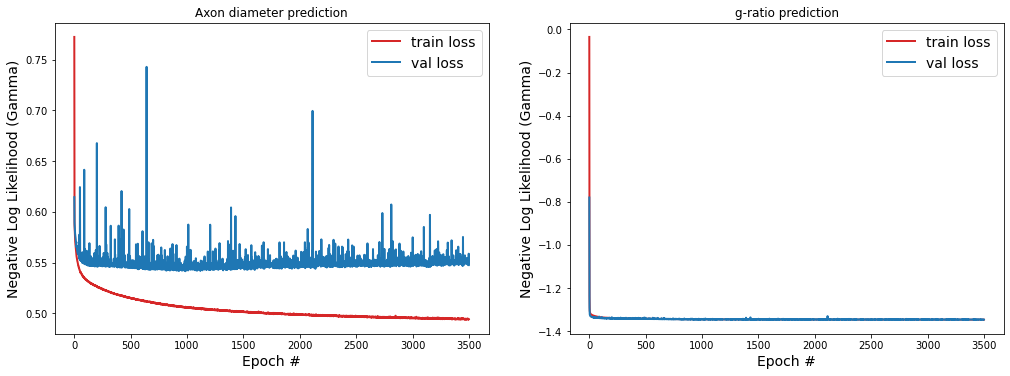

In [5]:
for dataset_name in _DATASET_LIST:
    print(f'Training dataset: {dataset_name}')
    file_name = os.path.join(_DATASET_FOLDER,f'{dataset_name}.pkl')
    with open(file_name, 'rb') as file:
        data_save = pickle.load(file)
    
    # Unpacks the data
    train_data = data_save['train']
    val_data = data_save['val']
    x_train = train_data['x_scaled']
    diameter_samples_train = train_data['diameter_samples']
    gratio_samples_train = train_data['gratio_samples']
    x_val = val_data['x_scaled']
    diameter_samples_val = val_data['diameter_samples']
    gratio_samples_val = val_data['gratio_samples']
    
    # Defines and compiles network
    num_features = x_train.shape[1]
    model = mfunc.create_multi_task_learning_model(num_features=num_features)
    model = mfunc.compile_multitask_model(model,_LEARNING_RATE)
    checkpoint_filepath = os.path.join('checkpoints',f'pretrain_{dataset_name}',f'pretrain_{dataset_name}')
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=True,
        monitor='val_loss',
        mode='min',
        save_best_only=True)

    
    validation_data = (x_val,
                       {'axon_output': diameter_samples_val,
                        'gratio_output': gratio_samples_val})
    history = model.fit(x_train, {'axon_output': diameter_samples_train,
                                         'gratio_output': gratio_samples_train},
                        epochs=_NUM_EPOCHS, validation_data=validation_data, 
                        batch_size=_BATCH_SIZE, verbose=1, shuffle=True, 
                        callbacks=[model_checkpoint_callback])
    name_loss_figure = os.path.join(_RESULTS_FOLDER,f'pretrain_loss_{dataset_name}.png')
    evaluation.plot_losses(history,name_loss_figure)
    model.load_weights(checkpoint_filepath)
    model_save_name = os.path.join(_MODEL_FOLDER,f'pretrain_{dataset_name}')
    model.save(model_save_name)